# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [50]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [51]:
def max_element(arr):
    zero_indices = np.where(arr[:-1] == 0)[0] + 1
    if len(zero_indices) == 0:
        return None

    return np.max(arr[zero_indices])

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))



5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [52]:
def nearest_value(X, v):
    diff = np.abs(X - v)
    min_index = np.argmin(diff)
    return X.flat[min_index]

X = np.arange(0, 10).reshape((2, 5))
v = 3.6
result = nearest_value(X, v)
print(result)

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [53]:
def scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_0 = np.where(std == 0, 1, std)
    # Масштабируем матрицу
    X_scaled = (X - mean) / std_0
    return X_scaled

X = np.random.randint(0, 10, size=(4, 3))
print("Исходная матрица:\n", X)
print("Масштабированная матрица:\n", scale(X))

Исходная матрица:
 [[2 1 4]
 [4 9 5]
 [2 3 3]
 [0 5 4]]
Масштабированная матрица:
 [[ 0.         -1.18321596  0.        ]
 [ 1.41421356  1.52127766  1.41421356]
 [ 0.         -0.50709255 -1.41421356]
 [-1.41421356  0.16903085  0.        ]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [54]:
def get_stats(X):
    # Определитель
    determinant = np.linalg.det(X)
    # След диагонали
    trace = np.trace(X)
    # Наименьший и наибольший элементы
    min_element = np.min(X)
    max_element = np.max(X)
    # Норма Фробениуса
    frobenius_norm = np.linalg.norm(X, 'fro')
    # Собственные числа
    eigenvalues = np.linalg.eigvals(X)
    # Обратная матрица (если она существует)
    try:
        inverse = np.linalg.inv(X)
    except np.linalg.LinAlgError:
        inverse = None  # если не существует

    return {
        'determinant': determinant,
        'trace': trace,
        'min_element': min_element,
        'max_element': max_element,
        'frobenius_norm': frobenius_norm,
        'eigenvalues': eigenvalues,
        'inverse': inverse
    }

# Генерируем матрицу с элементами из нормального распределения N(10, 1)
X = np.random.normal(loc=10, scale=1, size=(3, 3))
print("Матрица X:\n", X)

stats = get_stats(X)
print("Результаты:\n", stats)

Матрица X:
 [[11.00798672 10.76051952 11.77255557]
 [ 8.31180988 10.57559636 10.07035227]
 [11.05165923  7.78369488  9.09747296]]
Результаты:
 {'determinant': np.float64(-34.16174395388996), 'trace': np.float64(30.68105604013055), 'min_element': np.float64(7.7836948760606575), 'max_element': np.float64(11.772555573535612), 'frobenius_norm': np.float64(30.387302039886638), 'eigenvalues': array([30.15123068, -0.8319884 ,  1.36181376]), 'inverse': array([[-0.52183087,  0.18323289,  0.47244584],
       [-1.04437396,  0.87704571,  0.38063222],
       [ 1.5274775 , -0.97298268, -0.78967373]])}


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [55]:
max_elements = np.empty(100)
for exp_num in range(100):
    A = np.random.normal(size=(10, 10))
    B = np.random.normal(size=(10, 10))
    C = np.matmul(A, B)
    max_elements[exp_num] = np.max(C)

mean_max = np.mean(max_elements)
quantile_95 = np.quantile(max_elements, 0.95)

print("Среднее значение максимальных элементов:", mean_max)
print("95-процентная квантиль:", quantile_95)

Среднее значение максимальных элементов: 8.490295929468338
95-процентная квантиль: 12.415441901321584


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [56]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [57]:
df = pd.read_csv('2008.csv')
print(df)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

In [58]:
print(df['CancellationCode'].value_counts(dropna=False))

CancellationCode
NaN    68589
A        563
B        549
C        299
Name: count, dtype: int64


 (A = carrier, B = weather, C = NAS, D = security)

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [59]:
distance = df['Distance'].describe()

print(f"Среднее: {distance['mean']:.1f}")
print(f"Минимальное: {distance['min']:.1f}")
print(f"Максимальное: {distance['max']:.1f}")

Среднее: 724.5
Минимальное: 31.0
Максимальное: 4962.0


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [60]:
min_d = distance['min']
r = df[df['Distance'] == min_d]
print(r[['Month',  'DayofMonth', 'FlightNum', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest']])

       Month  DayofMonth  FlightNum UniqueCarrier TailNum Origin Dest
1116      12          30         65            AS  N795AS    WRG  PSG
6958      12          26         65            AS  N795AS    WRG  PSG
17349      8          18         64            AS  N768AS    PSG  WRG
27534      3          11         64            AS  N764AS    PSG  WRG
46082      8           9         65            AS  N708AS    WRG  PSG
48112      2          28         64            AS  N762AS    PSG  WRG


In [61]:
m = df[((df['Origin'] == 'WRG') | (df['Origin'] == 'PSG')) & ((df['Dest'] == 'PSG') | (df['Dest'] == 'WRG'))]
print(m[['Month','DayofMonth','Distance']].sort_values(['Month','DayofMonth']))

       Month  DayofMonth  Distance
48112      2          28        31
27534      3          11        31
46082      8           9        31
17349      8          18        31
6958      12          26        31
1116      12          30        31


Получается, что других дней не было

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [62]:
print(df['Origin'].value_counts().head(1))

Origin
ATL    4134
Name: count, dtype: int64


Международный аэропорт Хартсфилд-Джексон Атланта (ATL) — самый загруженный аэропорт в США по пассажиропотоку.

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [63]:
print(df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False))

Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
          ...    
PSG     20.250000
OXR     19.666667
WRG     18.000000
GST     13.000000
DLG           NaN
Name: AirTime, Length: 297, dtype: float64


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [64]:
airports = df.groupby('Origin').filter(lambda x: len(x) > 1000)

airports_0 = airports[airports['DepDelay'] > 0]
airports_сount = airports.groupby('Origin').size()
airports_0_count = airports_0.groupby('Origin').size()

print(((airports_0_count/airports_сount).sort_values(ascending=False) * 100).head(1))

Origin
EWR    51.115911
dtype: float64


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70000 non-null  int64  
 1   Month              70000 non-null  int64  
 2   DayofMonth         70000 non-null  int64  
 3   DayOfWeek          70000 non-null  int64  
 4   DepTime            68601 non-null  float64
 5   CRSDepTime         70000 non-null  int64  
 6   ArrTime            68444 non-null  float64
 7   CRSArrTime         70000 non-null  int64  
 8   UniqueCarrier      70000 non-null  object 
 9   FlightNum          70000 non-null  int64  
 10  TailNum            69180 non-null  object 
 11  ActualElapsedTime  68418 non-null  float64
 12  CRSElapsedTime     69991 non-null  float64
 13  AirTime            68418 non-null  float64
 14  ArrDelay           68418 non-null  float64
 15  DepDelay           68601 non-null  float64
 16  Origin             700

1. Пропущенные значения имеются, это видно по столбцу Non-Null

In [66]:
df.isnull().sum().sum()

np.int64(355215)

2. кол-во пропущенных значений

In [67]:
df.isnull().any(axis=1).sum()

np.int64(70000)

3. 70000 объектов имеют хотя бы один пропуск




In [68]:
df.isnull().any(axis=0).sum()

np.int64(16)

4. 16 признаков имеют хотя бы одно пропущенное значение

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [69]:
df['DepDelay'].isnull().sum()

np.int64(1399)

In [70]:
df[df['DepDelay'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN



1.   У всех этих рейсов не указано время вылета и прибытия, то есть они отменены. DepTime, ArrTime.
2.   CarrierDelay,	WeatherDelay,	NASDelay,	SecurityDelay, LateAircraftDelay - эти столбцы с пропущенным значением целевой переменной.
3. Diverted - 0, значит рейсы не были перенаправлены.
4. CRSDepTime, CRSArrTime - это столбцы с местным временем вылета и прибытия, я думаю их можно исключить.
5. TaxiIn,	TaxiOut - эти столбцы с пропущенным значением целевой переменной.





**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [71]:
print(df.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [72]:
columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for col in columns:
    df[col + '_Hour'] = df[col] // 100
    df[col + '_Minute'] = df[col] % 100
df = df.drop(columns=columns)
df.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [73]:
df = df.drop(columns=['TailNum', 'Year'], errors='ignore')

k = ['ArrDelay', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay']

df = df.drop(columns=[col for col in k if col in df.columns])

In [74]:
df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,Diverted,SecurityDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,0,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,0,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,0,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,0,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,0,NaN,8.0,15.0,8,20,12.0,43.0,13,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

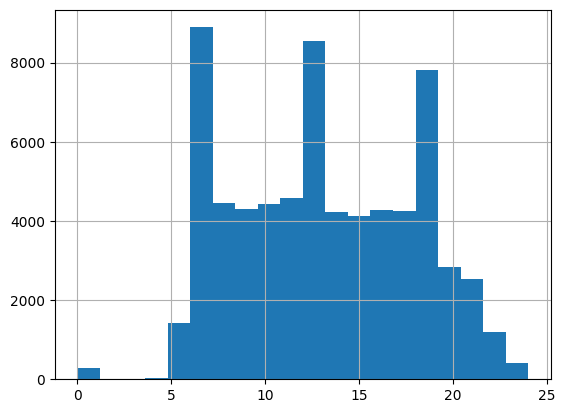

In [75]:
df['DepTime_Hour'].hist(bins=20)

<Axes: >

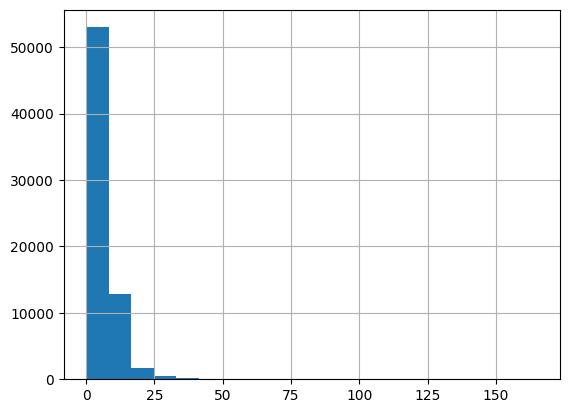

In [76]:
df['TaxiIn'].hist(bins=20)

<Axes: >

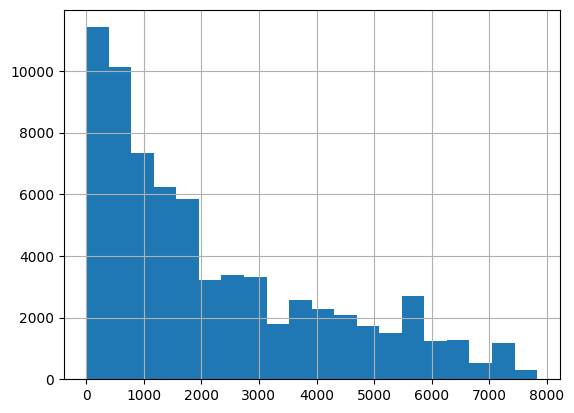

In [77]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

def transform_data(data):
    numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    data[numeric_features] = data[numeric_features].fillna(0)
    data[categorical_features] = data[categorical_features].fillna('nan')

    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(data[numeric_features])

    vectorizer = DictVectorizer(sparse=False)
    encoded_categorical = vectorizer.fit_transform(data[categorical_features].to_dict('records'))

    transformed_data = np.hstack([scaled_numeric, encoded_categorical])

    return transformed_data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [79]:
X = df.drop(columns=['DepDelay'])
df_transformed = transform_data(X)
df_transformed.shape[1]

641

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [80]:
from sklearn.model_selection import train_test_split
X = df_transformed
Y = df['DepDelay']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [81]:
y_train[:1000][np.isnan(y_train[:1000])] = 0
y_test[np.isnan(y_test)] = 0

/tmp/ipython-input-2325961846.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  y_train[:1000][np.isnan(y_train[:1000])] = 0


In [87]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, KFold

In [83]:
lr = LinearRegression()
lr.fit(X_train[:1000], y_train[:1000])

train_pred = lr.predict(X_train[:1000])
test_pred = lr.predict(X_test)

print("MSE на обучении:", mean_squared_error(y_train[:1000], train_pred))
print("R2 на обучении:", r2_score(y_train[:1000], train_pred))
print("MSE на контроле:", mean_squared_error(y_test, test_pred))
print("R2 на контроле:", r2_score(y_test, test_pred))

MSE на обучении: 601.4722162283928
R2 на обучении: 0.4005044112515448
MSE на контроле: 1512.1090991079818
R2 на контроле: -0.20190436657091237


MSE (среднеквадратичная ошибка):
На обучении ошибка составляет около 601.47, а на тесте — значительно выше — 1512.11. Это говорит о том, что модель в целом не очень точно предсказывает целевую переменную, особенно на новых данных.

R2 (коэффициент детерминации):
Значение R2 на обучающей выборке — 0.40, что означает, что модель объясняет около 40% вариации в данных. Это умеренный показатель, указывающий на слабое качество модели.
На тесте R2 — отрицательное (-0.20), что говорит о том, что модель предсказывает хуже, чем просто использование среднего значения. Это явный признак плохой обобщающей способности.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [84]:

X_train1 = X_train[:1000]
y_train1 = y_train[:1000]

alphas = np.logspace(-2, 3, 10)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring='neg_mean_squared_error', cv=10)
searcher.fit(X_train1, y_train1)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha1 = %.4f" % best_alpha)


alphas = np.logspace(-2, 3, 5)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring='neg_mean_squared_error', cv=10)
searcher.fit(X_train1, y_train1)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha2 = %.4f" % best_alpha)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e+04, tolerance: 9.487e+01
  model = cd_fast.enet_coordinate_descent(


Best alpha1 = 1.6681
Best alpha2 = 1000.0000


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e+05, tolerance: 1.003e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+05, tolerance: 1.003e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 1.003e

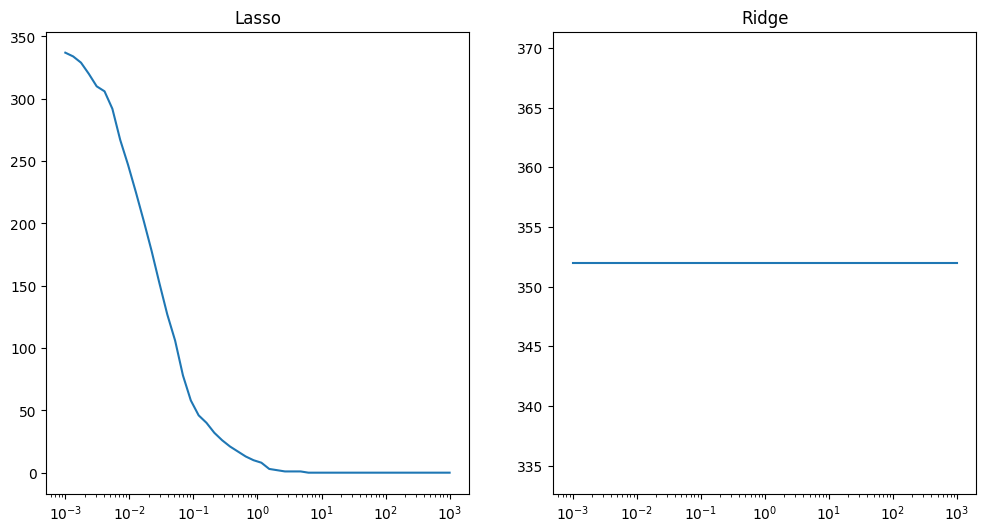

In [85]:
import matplotlib.pyplot as plt
alphas = np.logspace(-3, 3, 50)
lasso_nonzero = []
ridge_nonzero = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train[:1000], y_train[:1000])
    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > 0))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train[:1000], y_train[:1000])
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > 0))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogx(alphas, lasso_nonzero)
plt.title('Lasso')

plt.subplot(1, 2, 2)
plt.semilogx(alphas, ridge_nonzero)
plt.title('Ridge')

plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [88]:
ridge_default = Ridge(alpha=1.0, random_state=42)
ridge_default.fit(X_train1, y_train1)
y_pred_ridge = ridge_default.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 36.423569223126975
MAE: 19.65305575078733
R2: -0.0545126360656889


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучшее alpha по кросс-валидации: 33.9322177189533


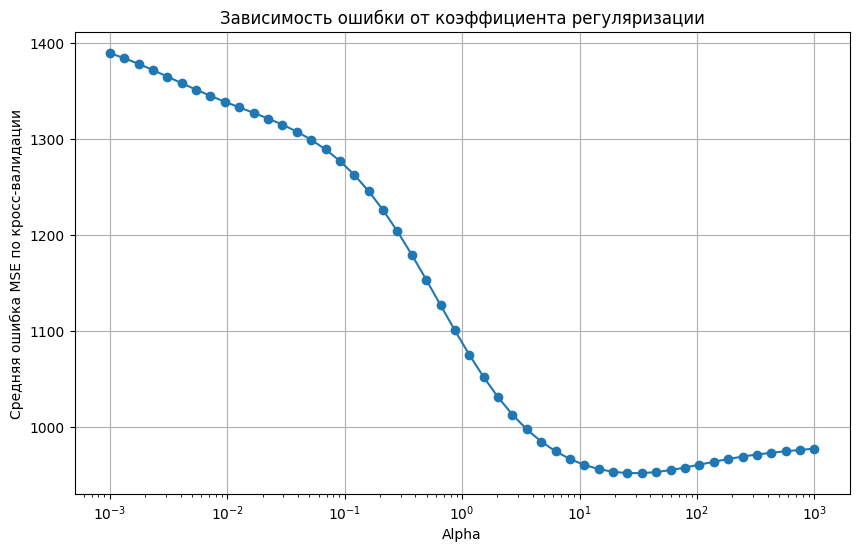

На обучающей выборке: MSE = 840.7798, R2 = 0.1620
На тестовой выборке: MSE = 1179.7597, R2 = 0.0623


In [92]:
X_train = X_train[:1000]
y_train = y_train[:1000]
# Создаем логарифмическую сетку значений alpha

param_grid = {'alpha': np.logspace(-3, 3, 50)}

# Определяем объект кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем модель Ridge
ridge = Ridge()

# Создаем GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

# Обучение с подбором гиперпараметра
grid_search.fit(X_train, y_train)

# Лучшее значение alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Лучшее alpha по кросс-валидации: {best_alpha}")

# Получение результатов для построения графика
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_errors = -mean_test_scores  # так как scoring='neg_mean_squared_error'

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(param_grid['alpha'], mean_test_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Средняя ошибка MSE по кросс-валидации')
plt.title('Зависимость ошибки от коэффициента регуляризации')
plt.grid(True)
plt.show()

# Обучение модели на лучших параметрах
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Предсказания и метрики
y_pred_train = best_ridge.predict(X_train)
y_pred_test = best_ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"На обучающей выборке: MSE = {train_mse:.4f}, R2 = {train_r2:.4f}")
print(f"На тестовой выборке: MSE = {test_mse:.4f}, R2 = {test_r2:.4f}")

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

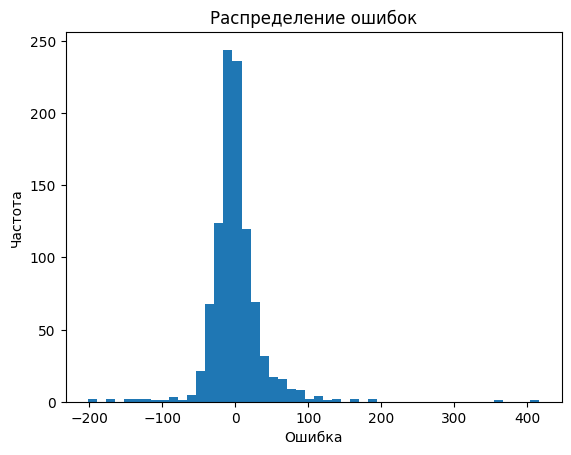

In [91]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
oof_predictions = cross_val_predict(LinearRegression(), X_train1, y_train1, cv=cv)
errors = y_train1 - oof_predictions

plt.hist(errors, bins=50)
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()